Import necessary libraries

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install geocoder
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import geocoder # to get coordinates
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 102kB 7.6MB/s ta 0:00:011
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0  

## Build basic Dataframe

In [2]:
url = 'https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs'
table = pd.read_html(url)

In [3]:
df = pd.DataFrame(table[1])
df.head()

,Stadtteil,Ortsteile,Bezirk,Fläche(km²),Einwohner,Bevölkerungsdichte(Einwohner/km²),Koordinaten,Karte
0,Hamburg-Altstadt,NaN,Hamburg-Mitte,NaN,2272.000,947,"53° 33′ 0″ N, 10° 0′ 0″ O",NaN
1,HafenCity,NaN,Hamburg-Mitte,NaN,4592.000,2087,"53° 32′ 28″ N, 10° 0′ 1″ O",NaN
2,Neustadt,NaN,Hamburg-Mitte,NaN,12.920,5617,"53° 33′ 7″ N, 9° 59′ 8″ O",NaN
3,St. Pauli,NaN,Hamburg-Mitte,NaN,22.436,8974,"53° 33′ 25″ N, 9° 57′ 50″ O",NaN
4,St. Georg,NaN,Hamburg-Mitte,NaN,11.384,4743,"53° 33′ 18″ N, 10° 0′ 44″ O",NaN


In [4]:
df.shape

(104, 8)

In [5]:
# Drop unwanted columns 
df=df.drop(['Ortsteile','Fläche(km²)','Karte','Koordinaten'], axis=1)

In [6]:
# Rename columns to English headers
nu_df=df.rename(columns={"Stadtteil": "Neighbourhood", "Bezirk": "District", 'Einwohner': 'Population', 'Bevölkerungsdichte(Einwohner/km²)':'Density'})
nu_df.head()

,Neighbourhood,District,Population,Density
0,Hamburg-Altstadt,Hamburg-Mitte,2272.000,947
1,HafenCity,Hamburg-Mitte,4592.000,2087
2,Neustadt,Hamburg-Mitte,12.920,5617
3,St. Pauli,Hamburg-Mitte,22.436,8974
4,St. Georg,Hamburg-Mitte,11.384,4743


In [7]:
# define a function to get coordinates:
def get_latlng(neighbourhood):
    # initialize your variable to None:
    lat_lng_coords = None
    # loop until you get the coordinates:
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hamburg, Germany'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [8]:
# call the function to get the coordinates and store to a new list
coords = [ get_latlng(neighbourhood) for neighbourhood in nu_df["Neighbourhood"].tolist() ]

In [9]:
coords

[[53.54992000000004, 9.99893000000003],
 [53.544440000000066, 9.99762000000004],
 [53.55479000000008, 9.989990000000034],
 [53.55700000000007, 9.964000000000055],
 [53.55513000000008, 10.01231000000007],
 [53.54623000000004, 10.024160000000052],
 [53.55226000000005, 10.034730000000025],
 [53.56067000000007, 10.055190000000039],
 [53.55489000000006, 10.087390000000028],
 [53.53958000000006, 10.103240000000028],
 [53.52929000000006, 10.075830000000053],
 [53.53514000000007, 10.041870000000074],
 [53.52359000000007, 10.016330000000039],
 [53.49830000000003, 10.012620000000027],
 [53.52488000000005, 9.998360000000048],
 [53.533150000000035, 9.969160000000045],
 [53.52679000000006, 9.899920000000066],
 [53.53335000000004, 9.87760000000003],
 [53.92194000000006, 8.50093000000004],
 [53.55078000000003, 9.940710000000024],
 [53.56171000000006, 9.965710000000058],
 [53.56804000000005, 9.948140000000024],
 [53.55420000000004, 9.928420000000074],
 [53.56466000000006, 9.90166000000005],
 [53.56564

In [10]:
# create a temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [11]:
# merge the coordinates into the original dataframe
nu_df['Latitude'] = df_coords['Latitude']
nu_df['Longitude'] = df_coords['Longitude']

In [12]:
# check out the neighborhoods and the coordinates
pd.set_option('display.max_rows', None)
print(nu_df.shape)
nu_df.head()

(104, 6)


,Neighbourhood,District,Population,Density,Latitude,Longitude
0,Hamburg-Altstadt,Hamburg-Mitte,2272.000,947,53.54992,9.99893
1,HafenCity,Hamburg-Mitte,4592.000,2087,53.54444,9.99762
2,Neustadt,Hamburg-Mitte,12.920,5617,53.55479,9.98999
3,St. Pauli,Hamburg-Mitte,22.436,8974,53.55700,9.96400
4,St. Georg,Hamburg-Mitte,11.384,4743,53.55513,10.01231


In [13]:
# Define Foursquare credentials and version
CLIENT_ID = 'VPDLGIV4MUCWN4OSTCYBULNL1FHNM50WZPRRGQDLCTFXGHLI' # your Foursquare ID
CLIENT_SECRET = 'NGO3TO0HBVHYSLVRYJCVGON1EXBG3HOLNM3Z1YXN33EU4151' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VPDLGIV4MUCWN4OSTCYBULNL1FHNM50WZPRRGQDLCTFXGHLI
CLIENT_SECRET:NGO3TO0HBVHYSLVRYJCVGON1EXBG3HOLNM3Z1YXN33EU4151


In [14]:
# get coordinates for Hamburg
address = 'Hamburg, Germany'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

53.5437641 10.0099133


In [15]:
# Get venues for Hamburg
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# Combine Hamburg Venues with Districts
Hamburg_venues = getNearbyVenues(names=nu_df['Neighbourhood'],
                                   latitudes=nu_df['Latitude'],
                                   longitudes=nu_df['Longitude']
                                  )

Hamburg-Altstadt
HafenCity
Neustadt
St. Pauli
St. Georg
Hammerbrook
Borgfelde
Hamm
Horn
Billstedt
Billbrook
Rothenburgsort
Veddel
Wilhelmsburg
Kleiner Grasbrook
Steinwerder
Waltershof
Finkenwerder
Neuwerk
Altona-Altstadt
Sternschanze
Altona-Nord
Ottensen
Bahrenfeld
Groß Flottbek
Othmarschen
Lurup
Osdorf
Nienstedten
Blankenese
Iserbrook
Sülldorf
Rissen
Eimsbüttel
Rotherbaum
Harvestehude
Hoheluft-West
Lokstedt
Niendorf
Schnelsen
Eidelstedt
Stellingen
Hoheluft-Ost
Eppendorf
Groß Borstel
Alsterdorf
Winterhude
Uhlenhorst
Hohenfelde
Barmbek-Süd
Dulsberg
Barmbek-Nord
Ohlsdorf
Fuhlsbüttel
Langenhorn
Eilbek
Wandsbek
Marienthal
Jenfeld
Tonndorf
Farmsen-Berne
Bramfeld
Steilshoop
Wellingsbüttel
Sasel
Poppenbüttel
Hummelsbüttel
Lemsahl-Mellingstedt
Duvenstedt
Wohldorf-Ohlstedt
Bergstedt
Volksdorf
Rahlstedt
Lohbrügge
Bergedorf
Curslack
Altengamme
Neuengamme
Kirchwerder
Ochsenwerder
Reitbrook
Allermöhe
Billwerder
Moorfleet
Tatenberg
Spadenland
Neuallermöhe
Harburg
Neuland
Gut Moor
Wilstorf
Rönneburg


In [17]:
print(Hamburg_venues.shape)
Hamburg_venues.head()

(1271, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hamburg-Altstadt,53.54992,9.99893,GOOT - Finest Cuts,53.548509,10.000675,Comfort Food Restaurant
1,Hamburg-Altstadt,53.54992,9.99893,O-ren Ishii,53.548291,9.997890,Vietnamese Restaurant
2,Hamburg-Altstadt,53.54992,9.99893,Picasso,53.549934,9.995627,Spanish Restaurant
3,Hamburg-Altstadt,53.54992,9.99893,Thalia Theater,53.551897,9.998384,Theater
4,Hamburg-Altstadt,53.54992,9.99893,Mi Chii,53.548320,9.998530,Vietnamese Restaurant


In [18]:
# merge Hamburg_venues with District Data (nu_df) to add latitude/longitude for each neighborhood
Hamburg_Data = Hamburg_venues.join(nu_df.set_index("Neighbourhood"), on="Neighbourhood")
print(Hamburg_Data.shape)
Hamburg_Data.head() 

(1271, 12)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,District,Population,Density,Latitude,Longitude
0,Hamburg-Altstadt,53.54992,9.99893,GOOT - Finest Cuts,53.548509,10.000675,Comfort Food Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893
1,Hamburg-Altstadt,53.54992,9.99893,O-ren Ishii,53.548291,9.997890,Vietnamese Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893
2,Hamburg-Altstadt,53.54992,9.99893,Picasso,53.549934,9.995627,Spanish Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893
3,Hamburg-Altstadt,53.54992,9.99893,Thalia Theater,53.551897,9.998384,Theater,Hamburg-Mitte,2272.0,947,53.54992,9.99893
4,Hamburg-Altstadt,53.54992,9.99893,Mi Chii,53.548320,9.998530,Vietnamese Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893


In [19]:
# shorten the names of the colums to remove blanks
Hamburg_Data=Hamburg_Data.rename(columns={"Neighbourhood Latitude":"hoodLat"})
Hamburg_Data=Hamburg_Data.rename(columns={"Neighbourhood Longitude":"hoodLng"})
Hamburg_Data=Hamburg_Data.rename(columns={"Venue Latitude":"VenueLat"})
Hamburg_Data=Hamburg_Data.rename(columns={"Venue Longitude":"VenueLng"})
Hamburg_Data=Hamburg_Data.rename(columns={"Venue Category":"VenueCat"})
Hamburg_Data.head()

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Hamburg-Altstadt,53.54992,9.99893,GOOT - Finest Cuts,53.548509,10.000675,Comfort Food Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893
1,Hamburg-Altstadt,53.54992,9.99893,O-ren Ishii,53.548291,9.997890,Vietnamese Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893
2,Hamburg-Altstadt,53.54992,9.99893,Picasso,53.549934,9.995627,Spanish Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893
3,Hamburg-Altstadt,53.54992,9.99893,Thalia Theater,53.551897,9.998384,Theater,Hamburg-Mitte,2272.0,947,53.54992,9.99893
4,Hamburg-Altstadt,53.54992,9.99893,Mi Chii,53.548320,9.998530,Vietnamese Restaurant,Hamburg-Mitte,2272.0,947,53.54992,9.99893


In [22]:
venue_Hamburg = Hamburg_Data[['VenueCat']]
venue_Hamburg.head()

,VenueCat
0,Comfort Food Restaurant
1,Vietnamese Restaurant
2,Spanish Restaurant
3,Theater
4,Vietnamese Restaurant


In [23]:
venue_Hamburg.to_csv('venue_Hamburg.txt', sep=',', index=False)

venue_Hamburg = open('venue_Hamburg.txt', 'r').read()

stopwords = set(STOPWORDS)

In [24]:
# instantiate a word cloud object
Hamburg_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Hamburg_WC.generate(venue_Hamburg)

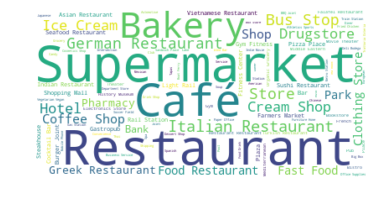

<Figure size 2160x3240 with 0 Axes>

In [25]:
# display the word cloud
plt.imshow(Hamburg_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

# Part 1: Comparison of districts

To analyse the three districts individually we extract the data for each district first and then perform our analysis.

## Data for Altona

In [26]:
# Extract Data for District of Altona
distr = Hamburg_Data.groupby(['District'])
alto = distr.get_group('Altona')

alto.sort_values(["Density"], inplace=True)
alto.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
482,Rissen,53.58208,9.75502,Oltec Jan Oltmanns,53.585180,9.759526,Electronics Store,Altona,15.763,944,53.58208,9.75502
481,Rissen,53.58208,9.75502,Schöns Park,53.585855,9.752702,Park,Altona,15.763,944,53.58208,9.75502
470,Rissen,53.58208,9.75502,Eiskalte Schnauze,53.581804,9.757394,Ice Cream Shop,Altona,15.763,944,53.58208,9.75502
472,Rissen,53.58208,9.75502,Rossmann,53.581624,9.757882,Drugstore,Altona,15.763,944,53.58208,9.75502
473,Rissen,53.58208,9.75502,REWE,53.581777,9.759713,Supermarket,Altona,15.763,944,53.58208,9.75502


In [27]:
# create map of Altona and its Venues using latitude and longitude values
map_alto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Venue in zip(alto['VenueLat'], alto['VenueLng'], alto['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_alto)  
    
map_alto

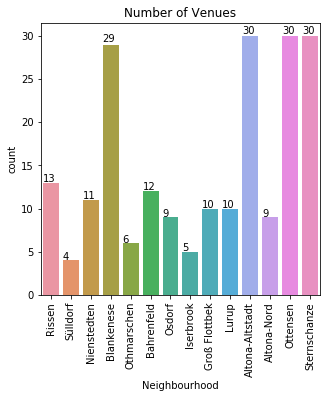

In [71]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighbourhood',data=alto)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

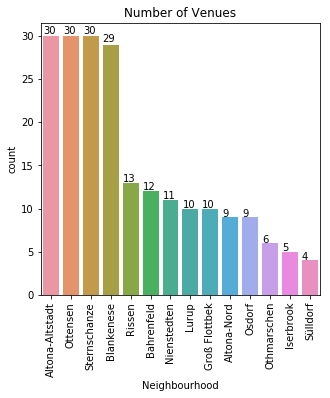

In [185]:
# Illustrate the distribution of venues in ordered form

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighbourhood',
              data=alto, 
              order = alto['Neighbourhood'].value_counts().index)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [72]:
venue_alto = alto[['VenueCat']]
venue_alto.head()

,VenueCat
482,Electronics Store
481,Park
470,Ice Cream Shop
472,Drugstore
473,Supermarket


In [73]:
venue_alto.to_csv('venue_alto.txt', sep=',', index=False, header=False)

venue_alto = open('venue_alto.txt', 'r').read()

stopwords = set(STOPWORDS)

In [74]:
# instantiate a word cloud object
Alto_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Alto_WC.generate(venue_alto)

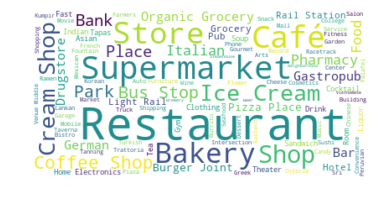

<Figure size 2160x3240 with 0 Axes>

In [75]:
# display the word cloud
plt.imshow(Alto_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Which of these neighbourhoods is the most urban or the most rural one?

In [34]:
# finding the Neighbourhood with the highest Density
df_alto = pd.DataFrame(alto,columns=['Neighbourhood','Population','Density'])
df_alto.head()
df_alto.loc[df_alto['Density'].idxmax()]

Neighbourhood    Sternschanze
Population               8095
Density                 16190
Name: 305, dtype: object

In [35]:
# finding the Neighbourhood with the lowest Density
df_alto.loc[df_alto['Density'].idxmin()]

Neighbourhood    Rissen
Population       15.763
Density             944
Name: 482, dtype: object

The most urban neighbourhood in Altona is Sternschanze and the most rural is Rissen

## Analyze Altonas neighbourhoods

In [36]:
# 
alto.groupby(["Neighbourhood"]).count()

,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
Neighbourhood,,,,,,,,,,,
Altona-Altstadt,30,30,30,30,30,30,30,30,30,30,30
Altona-Nord,9,9,9,9,9,9,9,9,9,9,9
Bahrenfeld,12,12,12,12,12,12,12,12,12,12,12
Blankenese,29,29,29,29,29,29,29,29,29,29,29
Groß Flottbek,10,10,10,10,10,10,10,10,10,10,10
Iserbrook,5,5,5,5,5,5,5,5,5,5,5
Lurup,10,10,10,10,10,10,10,10,10,10,10
Nienstedten,11,11,11,11,11,11,11,11,11,11,11
Osdorf,9,9,9,9,9,9,9,9,9,9,9


In [37]:
print('There are {} uniques categories.'.format(len(alto['VenueCat'].unique())))

# print out the list of categories
alto['VenueCat'].unique()

There are 87 uniques categories.


array(['Electronics Store', 'Park', 'Ice Cream Shop', 'Drugstore',
       'Supermarket', 'Light Rail Station', 'Pharmacy', 'Café',
       'Indian Restaurant', 'Organic Grocery', 'College Arts Building',
       'Bakery', 'Flower Shop', 'Convenience Store', 'Grocery Store',
       'Bus Stop', 'French Restaurant', 'Hotel', 'Wine Bar',
       'Sushi Restaurant', 'Tea Room', 'Italian Restaurant', 'Plaza',
       'Trattoria/Osteria', 'Mobile Phone Shop', 'Bank',
       'Fast Food Restaurant', 'Burger Joint', 'Tapas Restaurant',
       'Coffee Shop', 'Pub', 'German Restaurant', 'Garden', 'Racetrack',
       'Home Service', 'Shipping Store', 'Cosmetics Shop', 'Intersection',
       'Cocktail Bar', 'Liquor Store', 'Chinese Restaurant',
       'Auto Garage', 'Restaurant', 'Farmers Market', 'Shopping Mall',
       'Gastropub', 'Asian Restaurant', 'Tanning Salon', 'Taverna',
       'Turkish Restaurant', 'Furniture / Home Store', 'Snack Place',
       'Fountain', 'Gourmet Shop', 'Theater', 'Gym / F

In [38]:
# one hot encoding
alto_onehot = pd.get_dummies(alto[['VenueCat']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
alto_onehot['Neighbourhood'] = alto['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [alto_onehot.columns[-1]] + list(alto_onehot.columns[:-1])
alto_onehot = alto_onehot[fixed_columns]

alto_onehot.head()

,Neighbourhood,Asian Restaurant,Auto Garage,Bakery,Bank,Bar,Beer Store,Bistro,Brewery,Burger Joint,...,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Theater,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
482,Rissen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
481,Rissen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,Rissen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,Rissen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,Rissen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
alto_onehot = alto_onehot.groupby(["Neighbourhood"]).mean().reset_index()

print(alto_onehot.shape)
alto_onehot

(14, 88)


,Neighbourhood,Asian Restaurant,Auto Garage,Bakery,Bank,Bar,Beer Store,Bistro,Brewery,Burger Joint,...,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Theater,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,Altona-Altstadt,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,...,0.000000,0.0,0.033333,0.0,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000
1,Altona-Nord,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bahrenfeld,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Blankenese,0.000000,0.000000,0.068966,0.068966,0.000000,0.000000,0.000000,0.000000,0.034483,...,0.034483,0.0,0.034483,0.0,0.068966,0.000000,0.034483,0.000000,0.000000,0.000000
4,Groß Flottbek,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Iserbrook,0.000000,0.000000,0.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Lurup,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.1,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Nienstedten,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909
8,Osdorf,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Othmarschen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
# get the top 5 venues for each neighbourhood
num_top_venues = 5

for hood in alto_onehot['Neighbourhood']:
    print("----"+hood+"----")
    temp = alto_onehot[alto_onehot['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altona-Altstadt----
              venue  freq
0              Café  0.10
1       Supermarket  0.07
2    Sandwich Place  0.07
3      Burger Joint  0.07
4  Asian Restaurant  0.03


----Altona-Nord----
               venue  freq
0        Supermarket  0.22
1             Bakery  0.22
2  Food & Drink Shop  0.11
3         Food Truck  0.11
4                Gym  0.11


----Bahrenfeld----
               venue  freq
0     Ice Cream Shop  0.08
1        Supermarket  0.08
2       Intersection  0.08
3       Home Service  0.08
4  German Restaurant  0.08


----Blankenese----
            venue  freq
0            Café  0.10
1  Ice Cream Shop  0.07
2          Bakery  0.07
3            Bank  0.07
4            Park  0.07


----Groß Flottbek----
         venue  freq
0  Supermarket   0.2
1       Bakery   0.1
2   Restaurant   0.1
3        Hotel   0.1
4     Pharmacy   0.1


----Iserbrook----
                venue  freq
0                Bank   0.4
1              Bakery   0.2
2  Light Rail Station   0.2
3     

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

alto_venues_sorted = pd.DataFrame(columns=columns)
alto_venues_sorted['Neighbourhood'] = alto_onehot['Neighbourhood']

for ind in np.arange(alto_onehot.shape[0]):
    alto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alto_onehot.iloc[ind, :], num_top_venues)

alto_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Altona-Altstadt,Café,Sandwich Place,Burger Joint,Supermarket,Furniture / Home Store
1,Altona-Nord,Bakery,Supermarket,Sri Lankan Restaurant,Gym,Pharmacy
2,Bahrenfeld,Ice Cream Shop,Bus Stop,Home Service,German Restaurant,Intersection
3,Blankenese,Café,Ice Cream Shop,Bakery,Tea Room,Bank
4,Groß Flottbek,Supermarket,Hotel,German Restaurant,Farmers Market,Restaurant
5,Iserbrook,Bank,Bakery,Organic Grocery,Light Rail Station,Wine Bar
6,Lurup,Asian Restaurant,German Restaurant,Taverna,Gastropub,Tanning Salon
7,Nienstedten,Wine Bar,Pharmacy,Bakery,Bus Stop,Convenience Store
8,Osdorf,Liquor Store,Chinese Restaurant,Auto Garage,Bakery,Bank
9,Othmarschen,Bus Stop,German Restaurant,Park,Garden,Racetrack


In [44]:
# Get the single line for Sternschanze
alto_venues_sorted.loc[alto_venues_sorted['Neighbourhood'] == "Sternschanze"]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,Sternschanze,Coffee Shop,Gastropub,Restaurant,Cheese Shop,Seafood Restaurant


In [45]:
# Let's visualize Sternschanzes Venues as a world cloud

Sternschanze_data = alto[alto['Neighbourhood'] == 'Sternschanze'].reset_index(drop=True)
Sternschanze_data.head()

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Sternschanze,53.56171,9.96571,Elbgold,53.563152,9.967200,Coffee Shop,Altona,8095.0,16190,53.56171,9.96571
1,Sternschanze,53.56171,9.96571,Under Pressure,53.559729,9.964609,Clothing Store,Altona,8095.0,16190,53.56171,9.96571
2,Sternschanze,53.56171,9.96571,Goldfischglas,53.562592,9.964302,Cocktail Bar,Altona,8095.0,16190,53.56171,9.96571
3,Sternschanze,53.56171,9.96571,Souperia,53.561647,9.964871,Soup Place,Altona,8095.0,16190,53.56171,9.96571
4,Sternschanze,53.56171,9.96571,Getränke-Paradies Wolf,53.559915,9.964725,Liquor Store,Altona,8095.0,16190,53.56171,9.96571


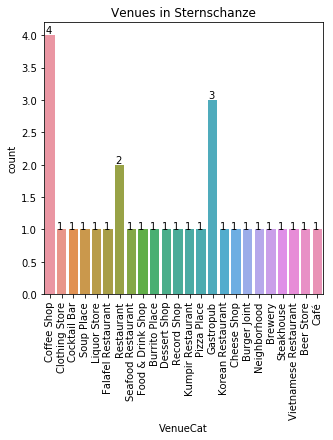

In [46]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='VenueCat',data=Sternschanze_data)
ax.set_title("Venues in Sternschanze")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [56]:
venue_stern = Sternschanze_data[['VenueCat']]
venue_stern

,VenueCat
0,Coffee Shop
1,Clothing Store
2,Cocktail Bar
3,Soup Place
4,Liquor Store
5,Falafel Restaurant
6,Restaurant
7,Seafood Restaurant
8,Coffee Shop
9,Food & Drink Shop


In [57]:
venue_stern.to_csv('venue_stern.txt', sep=',', index=False, header=False)

venue_stern = open('venue_stern.txt', 'r').read()
stopwords = set(STOPWORDS)

In [58]:
# instantiate a word cloud object
Stern_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Stern_WC.generate(venue_stern)

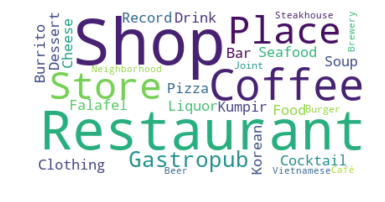

<Figure size 2160x3240 with 0 Axes>

In [59]:
# display the word cloud
plt.imshow(Stern_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [60]:
# Get the single line for Rissen
alto_venues_sorted.loc[alto_venues_sorted['Neighbourhood'] == "Rissen"]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Rissen,Supermarket,Ice Cream Shop,Light Rail Station,Pharmacy,Park


In [61]:
# Let's visualize Rissens Venues as a world cloud

Rissen_data = alto[alto['Neighbourhood'] == 'Rissen'].reset_index(drop=True)
Rissen_data.head()

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Rissen,53.58208,9.75502,Oltec Jan Oltmanns,53.585180,9.759526,Electronics Store,Altona,15.763,944,53.58208,9.75502
1,Rissen,53.58208,9.75502,Schöns Park,53.585855,9.752702,Park,Altona,15.763,944,53.58208,9.75502
2,Rissen,53.58208,9.75502,Eiskalte Schnauze,53.581804,9.757394,Ice Cream Shop,Altona,15.763,944,53.58208,9.75502
3,Rissen,53.58208,9.75502,Rossmann,53.581624,9.757882,Drugstore,Altona,15.763,944,53.58208,9.75502
4,Rissen,53.58208,9.75502,REWE,53.581777,9.759713,Supermarket,Altona,15.763,944,53.58208,9.75502


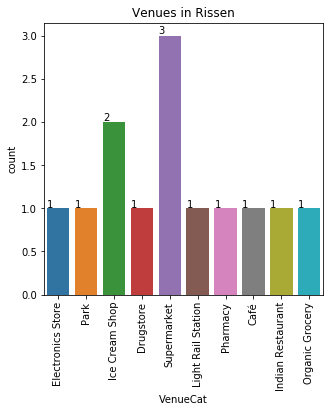

In [62]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='VenueCat',data=Rissen_data)
ax.set_title("Venues in Rissen")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [63]:
venue_rissen = Rissen_data[['VenueCat']]
venue_rissen

,VenueCat
0,Electronics Store
1,Park
2,Ice Cream Shop
3,Drugstore
4,Supermarket
5,Light Rail Station
6,Supermarket
7,Supermarket
8,Pharmacy
9,Café


In [64]:
venue_rissen.to_csv('venue_rissen.txt', sep=',', index=False, header=False)

venue_rissen = open('venue_rissen.txt', 'r').read()

stopwords = set(STOPWORDS)

In [65]:
# instantiate a word cloud object
Rissen_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Rissen_WC.generate(venue_rissen)

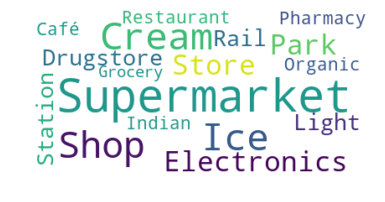

<Figure size 2160x3240 with 0 Axes>

In [66]:
# display the word cloud
plt.imshow(Rissen_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Data for Wandsbek

In [67]:
# Extract Data for District of Wandsbek
distr = Hamburg_Data.groupby(['District'])
wands = distr.get_group('Wandsbek')
print(wands.shape)
wands.sort_values(["Density"], inplace=True)
wands

(214, 12)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
1057,Wohldorf-Ohlstedt,53.69557,10.13900,Ohlstedter Platz,53.695617,10.140169,Plaza,Wandsbek,4662.000,269,53.69557,10.13900
1059,Wohldorf-Ohlstedt,53.69557,10.13900,Der Kiosk. Ohlstedt,53.694606,10.137309,Convenience Store,Wandsbek,4662.000,269,53.69557,10.13900
1058,Wohldorf-Ohlstedt,53.69557,10.13900,U Ohlstedt,53.695279,10.137914,Metro Station,Wandsbek,4662.000,269,53.69557,10.13900
1056,Wohldorf-Ohlstedt,53.69557,10.13900,TSV DUWO 08 Sportpark,53.695275,10.138179,Sports Club,Wandsbek,4662.000,269,53.69557,10.13900
1055,Wohldorf-Ohlstedt,53.69557,10.13900,Landhaus Ohlstedt,53.695535,10.138596,German Restaurant,Wandsbek,4662.000,269,53.69557,10.13900
1054,Wohldorf-Ohlstedt,53.69557,10.13900,Eisbär Ohlstedt,53.694990,10.137429,Ice Cream Shop,Wandsbek,4662.000,269,53.69557,10.13900
1053,Wohldorf-Ohlstedt,53.69557,10.13900,Wohldorfer Wald,53.697423,10.135241,Forest,Wandsbek,4662.000,269,53.69557,10.13900
1043,Lemsahl-Mellingstedt,53.68647,10.10536,Gasthaus Offen,53.686587,10.105344,German Restaurant,Wandsbek,6803.000,850,53.68647,10.10536
1052,Duvenstedt,53.70516,10.10575,von Allwörden,53.708759,10.107312,Bakery,Wandsbek,6220.000,915,53.70516,10.10575
1046,Duvenstedt,53.70516,10.10575,Ristorante Italia,53.707871,10.108221,Pizza Place,Wandsbek,6220.000,915,53.70516,10.10575


In [68]:
# create map of Wandsbek and its Venues using latitude and longitude values
map_wands = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Venue in zip(wands['VenueLat'], wands['VenueLng'], wands['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_wands)  
    
map_wands

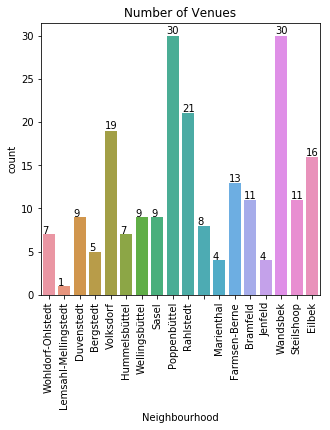

In [69]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighbourhood',data=wands)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

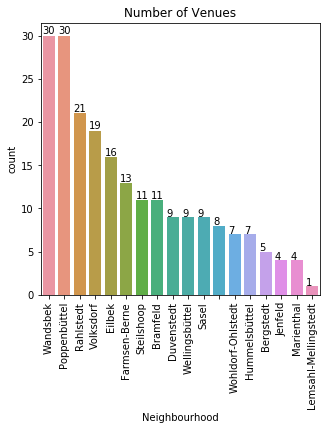

In [184]:
# Illustrate the distribution of venues in ordered form

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighbourhood',
              data=wands, 
              order = wands['Neighbourhood'].value_counts().index)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [70]:
venue_wands = wands[['VenueCat']]
venue_wands.head()

,VenueCat
1057,Plaza
1059,Convenience Store
1058,Metro Station
1056,Sports Club
1055,German Restaurant


In [76]:
venue_wands.to_csv('venue_wands.txt', sep=',', index=False, header=False)

venue_wands = open('venue_wands.txt', 'r').read()

stopwords = set(STOPWORDS)

In [77]:
# instantiate a word cloud object
wands_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
wands_WC.generate(venue_alto)

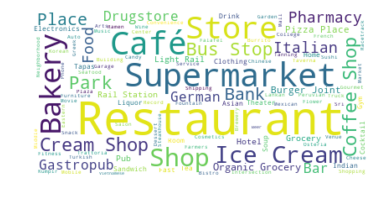

<Figure size 2160x3240 with 0 Axes>

In [78]:
# display the word cloud
plt.imshow(wands_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Which of these neighbourhoods is the most urban or the most rural one?

In [79]:
# finding the Neighbourhood with the highest Density
df_wands = pd.DataFrame(wands,columns=['Neighbourhood','Population','Density'])
df_wands.head()
df_wands.loc[df_wands['Density'].idxmax()]

Neighbourhood    Eilbek
Population       22.233
Density           12352
Name: 897, dtype: object

In [80]:
# finding the Neighbourhood with the lowest Density
df_wands.loc[df_wands['Density'].idxmin()]

Neighbourhood    Wohldorf-Ohlstedt
Population                    4662
Density                        269
Name: 1057, dtype: object

The most urban neighbourhood in Wandbek is Eilbek and the most rural is Wohldorf-Ohlstedt

## Analyze Wandsbeks neighbourhoods

In [81]:
# 
wands.groupby(["Neighbourhood"]).count()

,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
Neighbourhood,,,,,,,,,,,
Bergstedt,5,5,5,5,5,5,5,5,5,5,5
Bramfeld,11,11,11,11,11,11,11,11,11,11,11
Duvenstedt,9,9,9,9,9,9,9,9,9,9,9
Eilbek,16,16,16,16,16,16,16,16,16,16,16
Farmsen-Berne,13,13,13,13,13,13,13,13,13,13,13
Hummelsbüttel,7,7,7,7,7,7,7,7,7,7,7
Jenfeld,4,4,4,4,4,4,4,4,4,4,4
Lemsahl-Mellingstedt,1,1,1,1,1,1,1,1,1,1,1
Marienthal,4,4,4,4,4,4,4,4,4,4,4


In [82]:
print('There are {} uniques categories.'.format(len(wands['VenueCat'].unique())))

# print out the list of categories
wands['VenueCat'].unique()

There are 78 uniques categories.


array(['Plaza', 'Convenience Store', 'Metro Station', 'Sports Club',
       'German Restaurant', 'Ice Cream Shop', 'Forest', 'Bakery',
       'Pizza Place', 'Supermarket', 'Burger Joint',
       'Modern European Restaurant', 'Café', 'Farmers Market',
       'Department Store', 'Bus Stop', 'Fast Food Restaurant', 'Pool',
       'History Museum', 'Indie Movie Theater', 'Steakhouse',
       'Gas Station', 'Bank', 'American Restaurant',
       'Brazilian Restaurant', 'Italian Restaurant', 'Optical Shop',
       'Greek Restaurant', 'Hotel', 'Asian Restaurant',
       'Light Rail Station', 'Food', 'Gastropub', 'Dessert Shop',
       'Sushi Restaurant', 'Indian Restaurant', 'Deli / Bodega',
       'Coffee Shop', 'Clothing Store', 'Seafood Restaurant', 'Spa',
       'Shopping Mall', 'Electronics Store', 'Bookstore', 'Restaurant',
       'Drugstore', 'Thai Restaurant', 'Sandwich Place',
       'Mobile Phone Shop', 'Bus Station', 'Train Station', 'Gym',
       'Bagel Shop', 'Gym / Fitness Center

In [83]:
# one hot encoding
wands_onehot = pd.get_dummies(wands[['VenueCat']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
wands_onehot['Neighbourhood'] = wands['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [wands_onehot.columns[-1]] + list(wands_onehot.columns[:-1])
wands_onehot = wands_onehot[fixed_columns]

wands_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Big Box Store,Bistro,...,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Thai Restaurant,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant
1057,Wohldorf-Ohlstedt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,Wohldorf-Ohlstedt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058,Wohldorf-Ohlstedt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,Wohldorf-Ohlstedt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,Wohldorf-Ohlstedt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
wands_onehot = wands_onehot.groupby(["Neighbourhood"]).mean().reset_index()

print(wands_onehot.shape)
wands_onehot

(18, 79)


,Neighbourhood,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Bavarian Restaurant,Big Box Store,Bistro,...,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Thai Restaurant,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant
0,Bergstedt,0.000000,0.000000,0.000000,0.200000,0.000000,0.000,0.00,0.000000,0.0000,...,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00
1,Bramfeld,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.0000,...,0.000000,0.181818,0.000000,0.090909,0.000000,0.000000,0.000000,0.0000,0.000000,0.00
2,Duvenstedt,0.000000,0.000000,0.000000,0.111111,0.000000,0.000,0.00,0.000000,0.0000,...,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00
3,Eilbek,0.000000,0.000000,0.000000,0.125000,0.000000,0.000,0.00,0.000000,0.0625,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.00
4,Farmsen-Berne,0.000000,0.000000,0.000000,0.076923,0.000000,0.000,0.00,0.076923,0.0000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.0000,0.000000,0.00
5,Hummelsbüttel,0.000000,0.142857,0.000000,0.285714,0.000000,0.000,0.00,0.000000,0.0000,...,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00
6,Jenfeld,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.0000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.25
7,Lemsahl-Mellingstedt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00
8,Marienthal,0.000000,0.000000,0.000000,0.250000,0.000000,0.000,0.25,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.0000,0.000000,0.00
9,Poppenbüttel,0.000000,0.033333,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.0000,...,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.0000,0.000000,0.00


In [85]:
# get the top 5 venues for each neighbourhood
num_top_venues = 5

for hood in wands_onehot['Neighbourhood']:
    print("----"+hood+"----")
    temp = wands_onehot[wands_onehot['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bergstedt----
              venue  freq
0       Supermarket   0.4
1            Bakery   0.2
2          Bus Stop   0.2
3  Department Store   0.2
4  Kebab Restaurant   0.0


----Bramfeld----
                venue  freq
0               Plaza  0.18
1         Supermarket  0.18
2  Italian Restaurant  0.09
3   German Restaurant  0.09
4           Drugstore  0.09


----Duvenstedt----
                        venue  freq
0                 Supermarket  0.22
1              Ice Cream Shop  0.11
2              Farmers Market  0.11
3                        Café  0.11
4  Modern European Restaurant  0.11


----Eilbek----
            venue  freq
0  Ice Cream Shop  0.19
1            Café  0.19
2          Bakery  0.12
3          Bistro  0.06
4     Supermarket  0.06


----Farmsen-Berne----
                  venue  freq
0  Fast Food Restaurant  0.15
1          Skating Rink  0.08
2             Drugstore  0.08
3                Bakery  0.08
4             Pet Store  0.08


----Hummelsbüttel----
             

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

wands_venues_sorted = pd.DataFrame(columns=columns)
wands_venues_sorted['Neighbourhood'] = wands_onehot['Neighbourhood']

for ind in np.arange(wands_onehot.shape[0]):
    wands_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wands_onehot.iloc[ind, :], num_top_venues)

wands_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bergstedt,Supermarket,Department Store,Bakery,Bus Stop,Film Studio
1,Bramfeld,Supermarket,Plaza,Clothing Store,German Restaurant,Ice Cream Shop
2,Duvenstedt,Supermarket,Pizza Place,Burger Joint,Bakery,Ice Cream Shop
3,Eilbek,Ice Cream Shop,Café,Bakery,Bus Stop,Trattoria/Osteria
4,Farmsen-Berne,Fast Food Restaurant,Clothing Store,Supermarket,Pet Store,Drugstore
5,Hummelsbüttel,Bakery,Supermarket,Asian Restaurant,Hotel,Greek Restaurant
6,Jenfeld,Supermarket,Vietnamese Restaurant,Greek Restaurant,Film Studio,Department Store
7,Lemsahl-Mellingstedt,German Restaurant,Vietnamese Restaurant,Food,Dessert Shop,Donut Shop
8,Marienthal,Park,Train Station,Bakery,Bavarian Restaurant,Food
9,Poppenbüttel,Coffee Shop,Clothing Store,Italian Restaurant,Drugstore,Electronics Store


In [88]:
# Get the single line for Eilbek
wands_venues_sorted.loc[wands_venues_sorted['Neighbourhood'] == "Eilbek"]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Eilbek,Ice Cream Shop,Café,Bakery,Bus Stop,Trattoria/Osteria


In [89]:
# Let's visualize Eilbeks Venues as a world cloud

Eilbek_data = wands[wands['Neighbourhood'] == 'Eilbek'].reset_index(drop=True)
Eilbek_data.head()

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Eilbek,53.56523,10.04544,Otto's Eiscafé,53.568125,10.048674,Ice Cream Shop,Wandsbek,22.233,12352,53.56523,10.04544
1,Eilbek,53.56523,10.04544,Snoopkraam,53.564034,10.042726,Café,Wandsbek,22.233,12352,53.56523,10.04544
2,Eilbek,53.56523,10.04544,Café Rossio,53.567403,10.045289,Café,Wandsbek,22.233,12352,53.56523,10.04544
3,Eilbek,53.56523,10.04544,Taverna Mykonos,53.565305,10.050090,Greek Restaurant,Wandsbek,22.233,12352,53.56523,10.04544
4,Eilbek,53.56523,10.04544,Würfel & Zucker,53.568851,10.043567,Bistro,Wandsbek,22.233,12352,53.56523,10.04544


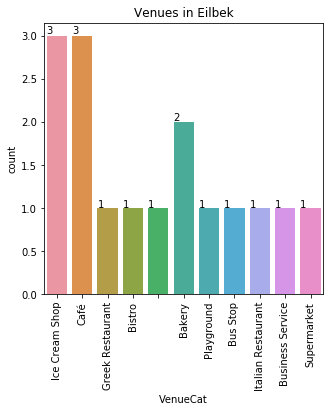

In [187]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='VenueCat',data=Eilbek_data)
ax.set_title("Venues in Eilbek")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [91]:
venue_Eilbek = Eilbek_data[['VenueCat']]
venue_Eilbek

,VenueCat
0,Ice Cream Shop
1,Café
2,Café
3,Greek Restaurant
4,Bistro
5,Trattoria/Osteria
6,Bakery
7,Bakery
8,Playground
9,Bus Stop


In [92]:
venue_Eilbek.to_csv('venue_Eilbek.txt', sep=',', index=False, header=False)

venue_Eilbek = open('venue_Eilbek.txt', 'r').read()

stopwords = set(STOPWORDS)

In [93]:
# instantiate a word cloud object
Eilbek_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Eilbek_WC.generate(venue_Eilbek)

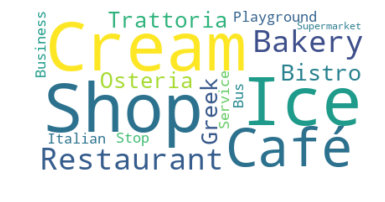

<Figure size 2160x3240 with 0 Axes>

In [94]:
# display the word cloud
plt.imshow(Eilbek_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [95]:
# Get the single line for Wohldorf-Ohlstedt
wands_venues_sorted.loc[wands_venues_sorted['Neighbourhood'] == "Wohldorf-Ohlstedt"]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Wohldorf-Ohlstedt,Convenience Store,Ice Cream Shop,German Restaurant,Plaza,Forest


In [96]:
# Let's visualize Wohldorf-Ohlstedt Venues as a world cloud

Wohl_data = wands[wands['Neighbourhood'] == 'Wohldorf-Ohlstedt'].reset_index(drop=True)
Wohl_data

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Wohldorf-Ohlstedt,53.69557,10.139,Ohlstedter Platz,53.695617,10.140169,Plaza,Wandsbek,4662.0,269,53.69557,10.139
1,Wohldorf-Ohlstedt,53.69557,10.139,Der Kiosk. Ohlstedt,53.694606,10.137309,Convenience Store,Wandsbek,4662.0,269,53.69557,10.139
2,Wohldorf-Ohlstedt,53.69557,10.139,U Ohlstedt,53.695279,10.137914,Metro Station,Wandsbek,4662.0,269,53.69557,10.139
3,Wohldorf-Ohlstedt,53.69557,10.139,TSV DUWO 08 Sportpark,53.695275,10.138179,Sports Club,Wandsbek,4662.0,269,53.69557,10.139
4,Wohldorf-Ohlstedt,53.69557,10.139,Landhaus Ohlstedt,53.695535,10.138596,German Restaurant,Wandsbek,4662.0,269,53.69557,10.139
5,Wohldorf-Ohlstedt,53.69557,10.139,Eisbär Ohlstedt,53.694990,10.137429,Ice Cream Shop,Wandsbek,4662.0,269,53.69557,10.139
6,Wohldorf-Ohlstedt,53.69557,10.139,Wohldorfer Wald,53.697423,10.135241,Forest,Wandsbek,4662.0,269,53.69557,10.139


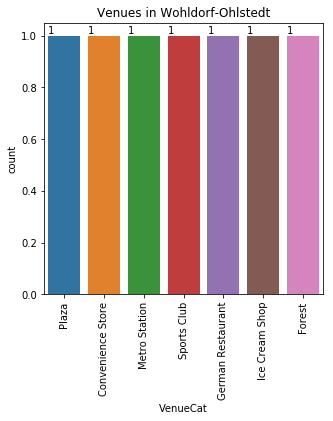

In [188]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='VenueCat',data=Wohl_data)
ax.set_title("Venues in Wohldorf-Ohlstedt")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [98]:
venue_Wohl = Wohl_data[['VenueCat']]
venue_Wohl

,VenueCat
0,Plaza
1,Convenience Store
2,Metro Station
3,Sports Club
4,German Restaurant
5,Ice Cream Shop
6,Forest


In [99]:
venue_Wohl.to_csv('venue_Wohl.txt', sep=',', index=False, header=False)

venue_Wohl = open('venue_Wohl.txt', 'r').read()

stopwords = set(STOPWORDS)

In [100]:
# instantiate a word cloud object
Wohl_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Wohl_WC.generate(venue_Wohl)

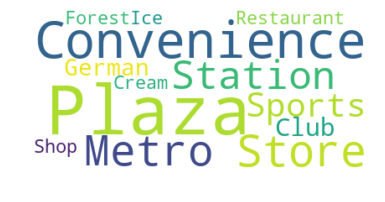

<Figure size 2160x3240 with 0 Axes>

In [101]:
# display the word cloud
plt.imshow(Wohl_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Data for Harburg

In [102]:
# Extract Data for District of Harburg
distr = Hamburg_Data.groupby(['District'])
har = distr.get_group('Harburg')
print(wands.shape)
har.sort_values(["Density"], inplace=True)
har

(214, 12)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
1248,Altenwerder,53.51193,9.91553,AS Hamburg-Waltershof (30),53.515422,9.917951,Intersection,Harburg,3.000,0,53.51193,9.91553
1246,Altenwerder,53.51193,9.91553,Autohof Waltershof,53.512689,9.913462,Rest Area,Harburg,3.000,0,53.51193,9.91553
1245,Altenwerder,53.51193,9.91553,Güterbahnhof Hansaport,53.512043,9.916151,Train Station,Harburg,3.000,0,53.51193,9.91553
1244,Altenwerder,53.51193,9.91553,Trucker-Treff,53.513180,9.913615,Gastropub,Harburg,3.000,0,53.51193,9.91553
1247,Altenwerder,53.51193,9.91553,Waltershofer Kreuzung,53.514178,9.912040,Intersection,Harburg,3.000,0,53.51193,9.91553
1207,Gut Moor,53.45202,10.00838,Poco Domäne,53.456165,10.009135,Furniture / Home Store,Harburg,146.000,73,53.45202,10.00838
1206,Gut Moor,53.45202,10.00838,OBI,53.453302,10.001909,Hardware Store,Harburg,146.000,73,53.45202,10.00838
1209,Gut Moor,53.45202,10.00838,Baby1One,53.456369,10.009086,Baby Store,Harburg,146.000,73,53.45202,10.00838
1208,Gut Moor,53.45202,10.00838,Dat Backhus,53.454022,10.002439,Bakery,Harburg,146.000,73,53.45202,10.00838
1243,Moorburg,53.48957,9.94208,Restaurant WASSERTURM in Moorburg,53.488466,9.935545,German Restaurant,Harburg,751.000,75,53.48957,9.94208


In [103]:
# create map of Wandsbek and its Venues using latitude and longitude values
map_har = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Venue in zip(har['VenueLat'], har['VenueLng'], har['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_har)  
    
map_har

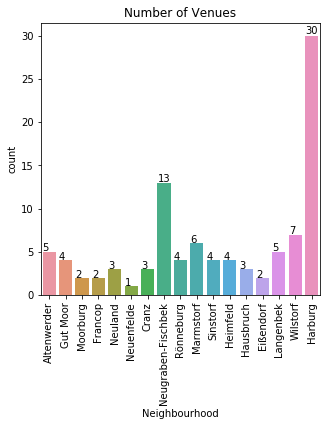

In [104]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighbourhood',data=har)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

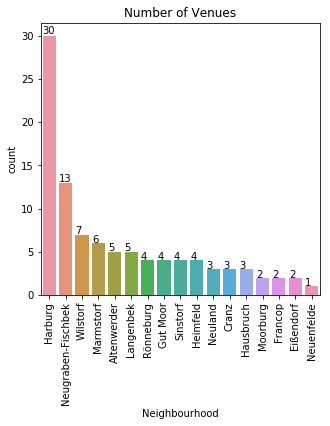

In [186]:
# Illustrate the distribution of venues in ordered form

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Neighbourhood',
              data=har, 
              order = har['Neighbourhood'].value_counts().index)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [109]:
venue_har = har[['VenueCat']]
venue_har.head()

,VenueCat
1248,Intersection
1246,Rest Area
1245,Train Station
1244,Gastropub
1247,Intersection


In [110]:
venue_har.to_csv('venue_har.txt', sep=',', index=False, header=False)

venue_har = open('venue_har.txt', 'r').read()

stopwords = set(STOPWORDS)

In [111]:
# instantiate a word cloud object
har_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
har_WC.generate(venue_har)

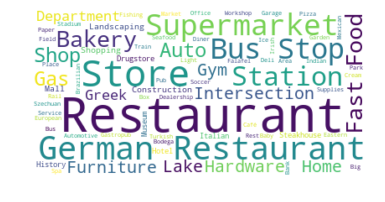

<Figure size 2160x3240 with 0 Axes>

In [112]:
# display the word cloud
plt.imshow(har_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Which of these neighbourhoods is the most urban or the most rural one?

In [113]:
# finding the Neighbourhood with the highest Density
df_har = pd.DataFrame(har,columns=['Neighbourhood','Population','Density'])
df_har.head()
df_har.loc[df_har['Density'].idxmax()]

Neighbourhood    Harburg
Population        25.912
Density             6478
Name: 1185, dtype: object

In [114]:
# finding the Neighbourhood with the lowest Density
df_har.loc[df_har['Density'].idxmin()]

Neighbourhood    Altenwerder
Population                 3
Density                    0
Name: 1248, dtype: object

The most urban neighbourhood in Harburg is Harburg and the most rural is Altenwerder

## Analyze Harburgs neighbourhoods

In [115]:
# 
har.groupby(["Neighbourhood"]).count()

,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
Neighbourhood,,,,,,,,,,,
Altenwerder,5,5,5,5,5,5,5,5,5,5,5
Cranz,3,3,3,3,3,3,3,3,3,3,3
Eißendorf,2,2,2,2,2,2,2,2,2,2,2
Francop,2,2,2,2,2,2,2,2,2,2,2
Gut Moor,4,4,4,4,4,4,4,4,4,4,4
Harburg,30,30,30,30,30,30,30,30,30,30,30
Hausbruch,3,3,3,3,3,3,3,3,3,3,3
Heimfeld,4,4,4,4,4,4,4,4,4,4,4
Langenbek,5,5,5,5,5,5,5,5,5,5,5


In [116]:
print('There are {} uniques categories.'.format(len(har['VenueCat'].unique())))

# print out the list of categories
har['VenueCat'].unique()

There are 56 uniques categories.


array(['Intersection', 'Rest Area', 'Train Station', 'Gastropub',
       'Furniture / Home Store', 'Hardware Store', 'Baby Store', 'Bakery',
       'German Restaurant', 'Lake', 'Auto Garage', 'Auto Dealership',
       'Bus Stop', 'Ice Cream Shop', 'Turkish Restaurant',
       'Szechuan Restaurant', 'Big Box Store', 'Supermarket',
       'Gas Station', 'Stadium', 'Gym', 'Soccer Field',
       'Department Store', 'Light Rail Station', 'Greek Restaurant',
       'Spa', 'Paper / Office Supplies Store', 'Deli / Bodega',
       'Fishing Store', 'Construction & Landscaping', 'Shop & Service',
       'Automotive Shop', 'Fast Food Restaurant', 'Garden', 'Diner',
       'Park', 'Pizza Place', 'Eastern European Restaurant',
       'Shopping Mall', 'Auto Workshop', 'Bus Station',
       'Brazilian Restaurant', 'Drugstore', 'Steakhouse',
       'History Museum', 'Mexican Restaurant', 'Irish Pub', 'Bank',
       'Market', 'Restaurant', 'Falafel Restaurant', 'Hotel',
       'Italian Restaurant', 'Sea

In [117]:
# one hot encoding
har_onehot = pd.get_dummies(har[['VenueCat']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
har_onehot['Neighbourhood'] = har['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [har_onehot.columns[-1]] + list(har_onehot.columns[:-1])
har_onehot = har_onehot[fixed_columns]

har_onehot.head()

,Neighbourhood,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,Baby Store,Bakery,Bank,Big Box Store,Brazilian Restaurant,...,Shop & Service,Shopping Mall,Soccer Field,Spa,Stadium,Steakhouse,Supermarket,Szechuan Restaurant,Train Station,Turkish Restaurant
1248,Altenwerder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,Altenwerder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,Altenwerder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1244,Altenwerder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,Altenwerder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
har_onehot = har_onehot.groupby(["Neighbourhood"]).mean().reset_index()

print(har_onehot.shape)
har_onehot

(17, 57)


,Neighbourhood,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,Baby Store,Bakery,Bank,Big Box Store,Brazilian Restaurant,...,Shop & Service,Shopping Mall,Soccer Field,Spa,Stadium,Steakhouse,Supermarket,Szechuan Restaurant,Train Station,Turkish Restaurant
0,Altenwerder,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.2,0.000000
1,Cranz,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,Eißendorf,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Francop,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Gut Moor,0.000000,0.000000,0.0,0.00,0.25,0.25,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Harburg,0.000000,0.000000,0.0,0.00,0.00,0.10,0.033333,0.000000,0.033333,...,0.000000,0.033333,0.000000,0.00,0.000000,0.066667,0.033333,0.000000,0.0,0.000000
6,Hausbruch,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.0,0.000000
7,Heimfeld,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Langenbek,0.000000,0.000000,0.2,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,Marmstorf,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.0,0.000000


In [119]:
# get the top 5 venues for each neighbourhood
num_top_venues = 5

for hood in har_onehot['Neighbourhood']:
    print("----"+hood+"----")
    temp = har_onehot[har_onehot['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altenwerder----
             venue  freq
0     Intersection   0.4
1    Train Station   0.2
2        Gastropub   0.2
3        Rest Area   0.2
4  Auto Dealership   0.0


----Cranz----
               venue  freq
0  German Restaurant  0.67
1           Bus Stop  0.33
2    Auto Dealership  0.00
3        Pizza Place  0.00
4     Ice Cream Shop  0.00


----Eißendorf----
                        venue  freq
0            Greek Restaurant   0.5
1  Construction & Landscaping   0.5
2             Auto Dealership   0.0
3                 Pizza Place   0.0
4              Ice Cream Shop   0.0


----Francop----
             venue  freq
0             Lake   1.0
1  Auto Dealership   0.0
2      Auto Garage   0.0
3            Hotel   0.0
4   Ice Cream Shop   0.0


----Gut Moor----
                    venue  freq
0          Hardware Store  0.25
1              Baby Store  0.25
2                  Bakery  0.25
3  Furniture / Home Store  0.25
4             Pizza Place  0.00


----Harburg----
                ven

In [120]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [121]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

har_venues_sorted = pd.DataFrame(columns=columns)
har_venues_sorted['Neighbourhood'] = har_onehot['Neighbourhood']

for ind in np.arange(har_onehot.shape[0]):
    har_venues_sorted.iloc[ind, 1:] = return_most_common_venues(har_onehot.iloc[ind, :], num_top_venues)

har_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Altenwerder,Intersection,Train Station,Gastropub,Rest Area,Deli / Bodega
1,Cranz,German Restaurant,Bus Stop,Turkish Restaurant,Department Store,Gastropub
2,Eißendorf,Greek Restaurant,Construction & Landscaping,Department Store,German Restaurant,Gastropub
3,Francop,Lake,Turkish Restaurant,Greek Restaurant,Gastropub,Gas Station
4,Gut Moor,Hardware Store,Baby Store,Bakery,Furniture / Home Store,Department Store
5,Harburg,Bakery,Fast Food Restaurant,German Restaurant,Steakhouse,Drugstore
6,Hausbruch,German Restaurant,Supermarket,Pizza Place,Deli / Bodega,Gastropub
7,Heimfeld,Gym,Diner,Fast Food Restaurant,Park,Automotive Shop
8,Langenbek,Bus Stop,Auto Workshop,Shopping Mall,Eastern European Restaurant,Turkish Restaurant
9,Marmstorf,Supermarket,Fishing Store,Shop & Service,Bus Stop,Construction & Landscaping


In [122]:
# Get the single line for Harburg
har_venues_sorted.loc[har_venues_sorted['Neighbourhood'] == "Harburg"]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Harburg,Bakery,Fast Food Restaurant,German Restaurant,Steakhouse,Drugstore


In [123]:
# Let's visualize Harburg Venues as a world cloud

Harburg_data = har[har['Neighbourhood'] == 'Harburg'].reset_index(drop=True)
Harburg_data.head()

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Harburg,53.46087,9.97842,Galeria Karstadt Kaufhof,53.460946,9.982465,Department Store,Harburg,25.912,6478,53.46087,9.97842
1,Harburg,53.46087,9.97842,EDEKA,53.461487,9.980066,Supermarket,Harburg,25.912,6478,53.46087,9.97842
2,Harburg,53.46087,9.97842,Panthera Rodizio,53.463488,9.981091,Brazilian Restaurant,Harburg,25.912,6478,53.46087,9.97842
3,Harburg,53.46087,9.97842,Rossmann,53.458446,9.983278,Drugstore,Harburg,25.912,6478,53.46087,9.97842
4,Harburg,53.46087,9.97842,Steakhammer,53.461342,9.984244,Steakhouse,Harburg,25.912,6478,53.46087,9.97842


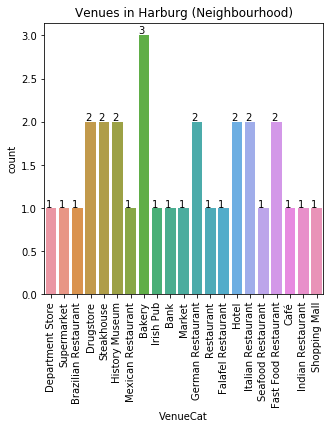

In [124]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='VenueCat',data=Harburg_data)
ax.set_title("Venues in Harburg (Neighbourhood)")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [125]:
venue_Harburg = Harburg_data[['VenueCat']]
venue_Harburg

,VenueCat
0,Department Store
1,Supermarket
2,Brazilian Restaurant
3,Drugstore
4,Steakhouse
5,History Museum
6,Mexican Restaurant
7,Bakery
8,Irish Pub
9,Bank


In [126]:
venue_Harburg.to_csv('venue_Harburg.txt', sep=',', index=False, header=False)

venue_Harburg = open('venue_Harburg.txt', 'r').read()

stopwords = set(STOPWORDS)

In [127]:
# instantiate a word cloud object
Harburg_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Harburg_WC.generate(venue_Harburg)

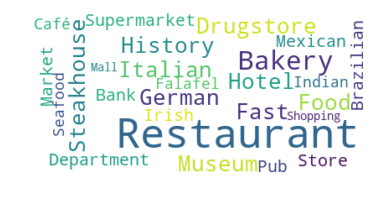

<Figure size 2160x3240 with 0 Axes>

In [128]:
# display the word cloud
plt.imshow(Harburg_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

In [129]:
# Get the single line for Altenwerder
har_venues_sorted.loc[har_venues_sorted['Neighbourhood'] == "Altenwerder"]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Altenwerder,Intersection,Train Station,Gastropub,Rest Area,Deli / Bodega


In [130]:
# Let's visualize Altenwerder Venues as a world cloud

Altenwerder_data = har[har['Neighbourhood'] == 'Altenwerder'].reset_index(drop=True)
Altenwerder_data

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
0,Altenwerder,53.51193,9.91553,AS Hamburg-Waltershof (30),53.515422,9.917951,Intersection,Harburg,3.0,0,53.51193,9.91553
1,Altenwerder,53.51193,9.91553,Autohof Waltershof,53.512689,9.913462,Rest Area,Harburg,3.0,0,53.51193,9.91553
2,Altenwerder,53.51193,9.91553,Güterbahnhof Hansaport,53.512043,9.916151,Train Station,Harburg,3.0,0,53.51193,9.91553
3,Altenwerder,53.51193,9.91553,Trucker-Treff,53.513180,9.913615,Gastropub,Harburg,3.0,0,53.51193,9.91553
4,Altenwerder,53.51193,9.91553,Waltershofer Kreuzung,53.514178,9.912040,Intersection,Harburg,3.0,0,53.51193,9.91553


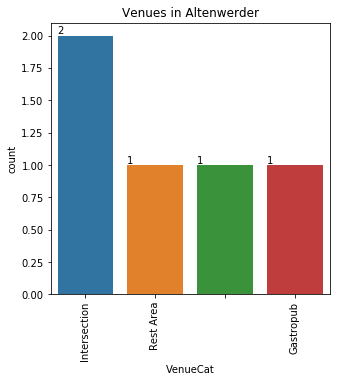

In [189]:
# Illustrate the distribution of venues

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='VenueCat',data=Altenwerder_data)
ax.set_title("Venues in Altenwerder")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [132]:
Altenwerder_venue = Altenwerder_data[['VenueCat']]
Altenwerder_venue

,VenueCat
0,Intersection
1,Rest Area
2,Train Station
3,Gastropub
4,Intersection


In [133]:
Altenwerder_venue.to_csv('Altenwerder_venue.txt', sep=',', index=False, header=False)

Altenwerder_venue = open('Altenwerder_venue.txt', 'r').read()

stopwords = set(STOPWORDS)

In [134]:
# instantiate a word cloud object
Altenwerder_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Altenwerder_WC.generate(Altenwerder_venue)

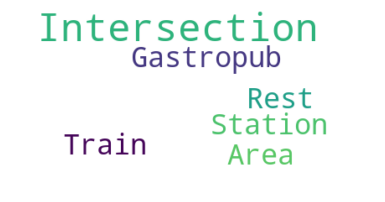

<Figure size 2160x3240 with 0 Axes>

In [135]:
# display the word cloud
plt.imshow(Altenwerder_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

# Part 2:  Location for new Italian Restaurant

Get back to the complete dataset for Hamburg and check, if there are other Categories that point to Italian Restaurants.

In [136]:
print('There are {} uniques categories.'.format(len(Hamburg_Data['VenueCat'].unique())))

# print out the list of categories
Hamburg_Data['VenueCat'].unique()

There are 212 uniques categories.


array(['Comfort Food Restaurant', 'Vietnamese Restaurant',
       'Spanish Restaurant', 'Theater', 'Coffee Shop',
       'Indie Movie Theater', 'Nightclub', 'Steakhouse', 'Burger Joint',
       'Furniture / Home Store', 'Café', 'Cocktail Bar',
       'German Restaurant', 'Hotel', 'Sushi Restaurant', 'Candy Store',
       'Food & Drink Shop', 'Falafel Restaurant', 'Mexican Restaurant',
       'French Restaurant', 'Korean Restaurant', 'Museum',
       'Austrian Restaurant', 'Neighborhood', 'Middle Eastern Restaurant',
       'Italian Restaurant', 'Bar', 'History Museum', 'Movie Theater',
       'Restaurant', 'Event Space', 'Chinese Restaurant', 'Supermarket',
       'Mediterranean Restaurant', 'Tea Room', 'Ice Cream Shop',
       'Tapas Restaurant', 'Asian Restaurant', 'Seafood Restaurant',
       'Opera House', 'Cosmetics Shop', 'Clothing Store', 'Plaza',
       'Salad Place', 'Chocolate Shop', 'Department Store',
       'Electronics Store', 'Lake', 'Japanese Restaurant', 'Wine Bar',
  

The list of categories reveals, that there are not only venues called "Italian Restaurant" but also "Trattoria/Osteria" which are also Italian venues.

In [137]:
# let's see how many are there
Hamburg_Data.query('VenueCat == "Trattoria/Osteria"').VenueCat.count()

4

In [138]:
Hamburg_Data.query('VenueCat == "Italian Restaurant"').VenueCat.count()

46

In [139]:
# So we need to replace Trattoria/Osteria with Italian Restaurant
Hamburg_Data.replace(to_replace = "Trattoria/Osteria", value = "Italian Restaurant", inplace=True)

In [140]:
# Testing if the replacement was successfull
Hamburg_Data.query('VenueCat == "Trattoria/Osteria"').VenueCat.count()

0

In [141]:
# new number of Italian Restaurants
Hamburg_Data.query('VenueCat == "Italian Restaurant"').VenueCat.count()

50

## Finding neighbourhood for Italian Restaurant

In [142]:
# Let's see in which neighbourhoods are Italian Restaurants
ItalRest_Data = Hamburg_Data.loc[Hamburg_Data['VenueCat'] == "Italian Restaurant"]
ItalRest_Data.head()

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
32,HafenCity,53.54444,9.99762,cantinetta ristorante & bar,53.544114,9.994533,Italian Restaurant,Hamburg-Mitte,4592.000,2087,53.54444,9.99762
49,HafenCity,53.54444,9.99762,Bella Italia,53.546386,9.997071,Italian Restaurant,Hamburg-Mitte,4592.000,2087,53.54444,9.99762
123,St. Georg,53.55513,10.01231,Il Buco,53.555524,10.012269,Italian Restaurant,Hamburg-Mitte,11.384,4743,53.55513,10.01231
140,St. Georg,53.55513,10.01231,Casa di Roma,53.558027,10.012260,Italian Restaurant,Hamburg-Mitte,11.384,4743,53.55513,10.01231
147,St. Georg,53.55513,10.01231,La Famiglia,53.553987,10.016389,Italian Restaurant,Hamburg-Mitte,11.384,4743,53.55513,10.01231


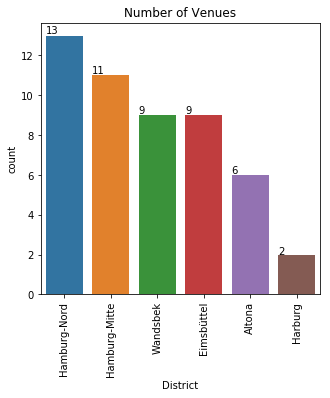

In [190]:
# Illustrate the distribution of Italian Restaurants

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='District',
              data=ItalRest_Data, 
              order = ItalRest_Data['District'].value_counts().index)
ax.set_title("Number of Venues")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [144]:
#

ItRest_Distr =ItalRest_Data.loc[ItalRest_Data['District'].isin(['Altona','Wandsbek','Harburg'])]

ItRest_Distr

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
280,Altona-Altstadt,53.55078,9.94071,Vapiano,53.551850,9.939612,Italian Restaurant,Altona,29.305,10466,53.55078,9.94071
350,Ottensen,53.55420,9.92842,Eisenstein,53.554388,9.927313,Italian Restaurant,Altona,35.585,12709,53.55420,9.92842
365,Ottensen,53.55420,9.92842,Il Vagabondo,53.556585,9.928270,Italian Restaurant,Altona,35.585,12709,53.55420,9.92842
376,Bahrenfeld,53.56466,9.90166,L'Europeo,53.565701,9.894600,Italian Restaurant,Altona,29.976,2828,53.56466,9.90166
434,Blankenese,53.56314,9.81232,Dal Fabbro,53.559498,9.811345,Italian Restaurant,Altona,13.686,1777,53.56314,9.81232
441,Blankenese,53.56314,9.81232,mama trattoria,53.562370,9.812360,Italian Restaurant,Altona,13.686,1777,53.56314,9.81232
896,Eilbek,53.56523,10.04544,Trattoria Italiana,53.567419,10.044616,Italian Restaurant,Wandsbek,22.233,12352,53.56523,10.04544
904,Eilbek,53.56523,10.04544,La Piazzetta,53.566238,10.039240,Italian Restaurant,Wandsbek,22.233,12352,53.56523,10.04544
913,Wandsbek,53.57205,10.06707,Ristorante Da Franco,53.572711,10.067121,Italian Restaurant,Wandsbek,36.149,6025,53.57205,10.06707
918,Wandsbek,53.57205,10.06707,Ristorante Angelo,53.573911,10.072764,Italian Restaurant,Wandsbek,36.149,6025,53.57205,10.06707


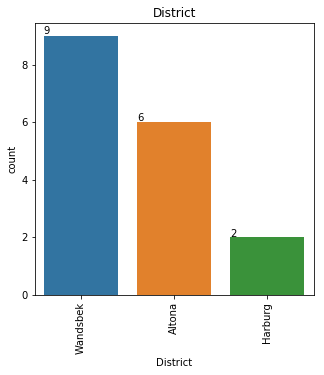

In [193]:
# Illustrate in which District of interest are the least number of Italian Restaurants

fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='District',data=ItRest_Distr,order = ItRest_Distr['District'].value_counts().index)
ax.set_title("District")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

### Perform a kmeans clustering on Harburg Data to see which neighbourhood would be best for an Italian Restuarant

In [146]:
#Get all the Venue Data from Hamburg_Data
Venue_Distr =Hamburg_Data.loc[Hamburg_Data['District'].isin(['Harburg'])]

Venue_Distr

,Neighbourhood,hoodLat,hoodLng,Venue,VenueLat,VenueLng,VenueCat,District,Population,Density,Latitude,Longitude
1173,Harburg,53.46087,9.97842,Al Limone,53.463771,9.980960,Italian Restaurant,Harburg,25.912,6478,53.46087,9.97842
1174,Harburg,53.46087,9.97842,Wochenmarkt Harburger Sand,53.461624,9.980300,Market,Harburg,25.912,6478,53.46087,9.97842
1175,Harburg,53.46087,9.97842,Block House,53.461944,9.980773,Steakhouse,Harburg,25.912,6478,53.46087,9.97842
1176,Harburg,53.46087,9.97842,Archäologisches Museum Hamburg | Helms-Museum,53.458992,9.977556,History Museum,Harburg,25.912,6478,53.46087,9.97842
1177,Harburg,53.46087,9.97842,The Old Dubliner,53.463651,9.980528,Irish Pub,Harburg,25.912,6478,53.46087,9.97842
1178,Harburg,53.46087,9.97842,BackWerk,53.460084,9.982548,Bakery,Harburg,25.912,6478,53.46087,9.97842
1179,Harburg,53.46087,9.97842,Southside Harburg,53.461635,9.979491,Mexican Restaurant,Harburg,25.912,6478,53.46087,9.97842
1180,Harburg,53.46087,9.97842,Caspari,53.463560,9.980940,German Restaurant,Harburg,25.912,6478,53.46087,9.97842
1181,Harburg,53.46087,9.97842,Steakhammer,53.461342,9.984244,Steakhouse,Harburg,25.912,6478,53.46087,9.97842
1182,Harburg,53.46087,9.97842,Rossmann,53.458446,9.983278,Drugstore,Harburg,25.912,6478,53.46087,9.97842


In [147]:
# one hot encoding
venue_onehot = pd.get_dummies(Venue_Distr[['VenueCat']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
venue_onehot['Neighbourhood'] = Venue_Distr['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [venue_onehot.columns[-1]] + list(venue_onehot.columns[:-1])
venue_onehot = venue_onehot[fixed_columns]

venue_onehot.head()

,Neighbourhood,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,Baby Store,Bakery,Bank,Big Box Store,Brazilian Restaurant,...,Shop & Service,Shopping Mall,Soccer Field,Spa,Stadium,Steakhouse,Supermarket,Szechuan Restaurant,Train Station,Turkish Restaurant
1173,Harburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1174,Harburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1175,Harburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1176,Harburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1177,Harburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
venue_onehot = venue_onehot.groupby(["Neighbourhood"]).mean().reset_index()

print(venue_onehot.shape)
venue_onehot.head()

(17, 57)


,Neighbourhood,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,Baby Store,Bakery,Bank,Big Box Store,Brazilian Restaurant,...,Shop & Service,Shopping Mall,Soccer Field,Spa,Stadium,Steakhouse,Supermarket,Szechuan Restaurant,Train Station,Turkish Restaurant
0,Altenwerder,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
1,Cranz,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eißendorf,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Francop,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gut Moor,0.0,0.0,0.0,0.0,0.25,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's see in which Neighbourhoods there are already a lot restaurants

In [149]:
#extracting all the restaurants from the venues
restaurant_List = []
search = 'Restaurant'
for i in venue_onehot.columns :
    if search in i:
        restaurant_List.append(i)
restaurant_List

['Brazilian Restaurant',
 'Eastern European Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Mexican Restaurant',
 'Restaurant',
 'Seafood Restaurant',
 'Szechuan Restaurant',
 'Turkish Restaurant']

In [150]:
col_name = []
col_name = restaurant_List
Distr_restaurant = venue_onehot[col_name]
Distr_restaurant = Distr_restaurant.iloc[:,1::]
Distr_restaurant.head()

,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Turkish Restaurant
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
# merge the coordinates into the original dataframe
Distr_restaurant['Neighbourhood'] = venue_onehot['Neighbourhood']

In [152]:
Distr_restaurant_grouped = Distr_restaurant.groupby('Neighbourhood').sum().reset_index()

In [153]:
Distr_restaurant_grouped['Total'] = Distr_restaurant_grouped .sum(axis=1)
Distr_restaurant_grouped

,Neighbourhood,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Turkish Restaurant,Total
0,Altenwerder,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cranz,0.0,0.000000,0.000000,0.666667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
2,Eißendorf,0.0,0.000000,0.000000,0.000000,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
3,Francop,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Gut Moor,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Harburg,0.0,0.033333,0.066667,0.066667,0.00,0.033333,0.066667,0.033333,0.033333,0.033333,0.000000,0.000000,0.366667
6,Hausbruch,0.0,0.000000,0.000000,0.333333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
7,Heimfeld,0.0,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
8,Langenbek,0.2,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
9,Marmstorf,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [154]:
# set number of clusters
kclusters = 3

Distr_restaurant_clustering = Distr_restaurant_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Distr_restaurant_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0], dtype=int32)

In [155]:
Distr_results = pd.DataFrame(kmeans.cluster_centers_)
Distr_results.columns = Distr_restaurant_clustering.columns
Distr_results.index = ['cluster0','cluster1','cluster2']
Distr_results['Total Sum'] = Distr_results.sum(axis = 1)
Distr_results

,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Turkish Restaurant,Total,Total Sum
cluster0,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cluster1,0.000,0.000000,0.000000,0.888889,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888889,1.777778
cluster2,0.025,0.004167,0.070833,0.059615,0.09375,0.004167,0.008333,0.004167,0.004167,0.004167,0.009615,0.009615,0.297596,0.595192


The Total and Total Sum of cluster0 have the smallest value. It shows that the market in this cluster is not saturated with restaurants.

In [156]:
# prepare the data to create a map of the clusters
Distr_results_merged = pd.DataFrame(Distr_restaurant_grouped['Neighbourhood'])

Distr_results_merged['Total'] = Distr_restaurant_grouped['Total']
Distr_results_merged = Distr_results_merged.assign(Cluster_Labels = kmeans.labels_)
Distr_results_merged

,Neighbourhood,Total,Cluster_Labels
0,Altenwerder,0.000000,0
1,Cranz,0.666667,1
2,Eißendorf,0.500000,2
3,Francop,0.000000,0
4,Gut Moor,0.000000,0
5,Harburg,0.366667,2
6,Hausbruch,0.333333,2
7,Heimfeld,0.250000,2
8,Langenbek,0.200000,2
9,Marmstorf,0.000000,0


In [157]:
Distr_Geo = nu_df.loc[(nu_df['District'] == 'Harburg')]
Distr_Geo = Distr_Geo.reset_index(drop=True)
Distr_Geo.head()

,Neighbourhood,District,Population,Density,Latitude,Longitude
0,Harburg,Harburg,25.912,6478,53.46087,9.97842
1,Neuland,Harburg,1583.000,198,53.46285,10.00495
2,Gut Moor,Harburg,146.000,73,53.45202,10.00838
3,Wilstorf,Harburg,17.506,5149,53.44746,9.99021
4,Rönneburg,Harburg,3430.000,1491,53.43829,10.00310


In [158]:
Distr_merged = Distr_Geo

Distr_merged = Distr_merged.join(Distr_results_merged.set_index('Neighbourhood'), on='Neighbourhood')
Distr_merged = Distr_merged.sort_values(by =['Cluster_Labels','Total','Density'])
print(Distr_merged.shape)
Distr_merged # check the last columns!

(17, 8)


,Neighbourhood,District,Population,Density,Latitude,Longitude,Total,Cluster_Labels
11,Altenwerder,Harburg,3.000,0,53.51193,9.91553,0.000000,0
2,Gut Moor,Harburg,146.000,73,53.45202,10.00838,0.000000,0
14,Francop,Harburg,709.000,81,53.50795,9.84766,0.000000,0
1,Neuland,Harburg,1583.000,198,53.46285,10.00495,0.000000,0
7,Marmstorf,Harburg,8929.000,1539,53.43991,9.96058,0.000000,0
3,Wilstorf,Harburg,17.506,5149,53.44746,9.99021,0.000000,0
16,Cranz,Harburg,799.000,615,53.53412,9.77574,0.666667,1
10,Moorburg,Harburg,751.000,75,53.48957,9.94208,1.000000,1
15,Neuenfelde,Harburg,4848.000,311,53.51369,9.81147,1.000000,1
5,Langenbek,Harburg,4040.000,5050,53.43191,9.98363,0.200000,2


In [167]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Distr_merged['Latitude'], Distr_merged['Longitude'], Distr_merged['Neighbourhood'], Distr_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [175]:
# get the neighbourhoods whose population is above the mean of the column 
Ital_Loc = Distr_merged[(Distr_merged['Cluster_Labels'] == 0) & (Distr_merged['Population'] > Distr_merged["Population"].mean())]
Ital_Loc

,Neighbourhood,District,Population,Density,Latitude,Longitude,Total,Cluster_Labels
7,Marmstorf,Harburg,8929.0,1539,53.43991,9.96058,0.0,0


In [171]:
# get the neighbourhoods whose density is above the mean of the column 
Ital_loc2 = Distr_merged[(Distr_merged['Cluster_Labels'] == 0) & (Distr_merged['Density'] > Distr_merged["Density"].mean())]
Ital_loc2

,Neighbourhood,District,Population,Density,Latitude,Longitude,Total,Cluster_Labels
3,Wilstorf,Harburg,17.506,5149,53.44746,9.99021,0.0,0


In [177]:
#combining the two
ital = [Ital_Loc, Ital_loc2]
ital_df = pd.concat(ital)

ital_df

,Neighbourhood,District,Population,Density,Latitude,Longitude,Total,Cluster_Labels
7,Marmstorf,Harburg,8929.000,1539,53.43991,9.96058,0.0,0
3,Wilstorf,Harburg,17.506,5149,53.44746,9.99021,0.0,0


In [179]:
# create map
map_Ital_Loc = folium.Map(location=[53.46087, 9.97842], zoom_start=13)


# add markers to the map
for lat, lon, poi in zip(ital_df['Latitude'], ital_df['Longitude'], ital_df['Neighbourhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Ital_Loc)
       
map_Ital_Loc